In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16045,-122.45,37.71,45.0,2253.0,431.0,1382.0,392.0,4.2562,221600.0,NEAR OCEAN
19836,-119.40,36.53,28.0,2201.0,429.0,1524.0,412.0,2.7500,65000.0,INLAND
20619,-121.56,39.01,22.0,1891.0,340.0,1023.0,296.0,2.7303,99100.0,INLAND
14544,-117.25,32.96,18.0,4773.0,743.0,1970.0,716.0,6.6199,406200.0,NEAR OCEAN
16569,-121.42,37.76,18.0,5501.0,1051.0,2964.0,1009.0,4.1855,162100.0,INLAND


In [3]:
housing_data = housing_data.dropna()

In [4]:
housing_data.shape

(20433, 10)

In [6]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [7]:
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [8]:
housing_data.shape

(19475, 10)

In [9]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [11]:
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])

In [12]:
housing_data.shape

(19475, 14)

In [13]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
6224,-117.93,34.05,36.0,1340.0,221.0,848.0,244.0,4.1731,205100.0,1,0,0,0,0
12668,-121.44,38.48,12.0,4929.0,1010.0,2621.0,870.0,2.7262,109800.0,0,1,0,0,0
5430,-118.42,34.02,26.0,2664.0,842.0,1745.0,789.0,3.4269,301900.0,1,0,0,0,0
11809,-121.10,38.94,42.0,410.0,117.0,706.0,112.0,1.0179,125000.0,0,1,0,0,0
15883,-122.39,37.73,43.0,4864.0,972.0,3134.0,959.0,4.3393,217300.0,0,0,0,1,0


In [14]:
X = housing_data.drop('median_house_value', axis=1)
Y = housing_data['median_house_value']

In [15]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [18]:
from  sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [19]:
print("Training_score: ", linear_model.score(x_train, y_train))

Training_score:  0.6109468437103373


In [20]:
predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [21]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND       -5.213710e+17
ocean_proximity_NEAR BAY     -5.213710e+17
ocean_proximity_<1H OCEAN    -5.213710e+17
ocean_proximity_NEAR OCEAN   -5.213710e+17
ocean_proximity_ISLAND       -5.213710e+17
longitude                    -2.467224e+04
latitude                     -2.266077e+04
population                   -2.844755e+01
total_rooms                  -7.427434e+00
households                    3.766953e+01
total_bedrooms                9.342288e+01
housing_median_age            9.501187e+02
median_income                 3.875865e+04
dtype: float64


In [22]:
y_pred = linear_model.predict(x_test)

In [23]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
7274,123712.0,115400.0
9265,157312.0,121300.0
13940,151360.0,135200.0
5073,227008.0,96600.0
8517,252224.0,210100.0
5022,208320.0,149600.0
13397,114752.0,116400.0
19526,162688.0,137500.0
12443,-52288.0,53500.0
17943,252096.0,256100.0


In [24]:
from sklearn.metrics import r2_score

print('Testing_score: ', r2_score(y_test, y_pred))

Testing_score:  0.6192993961411777


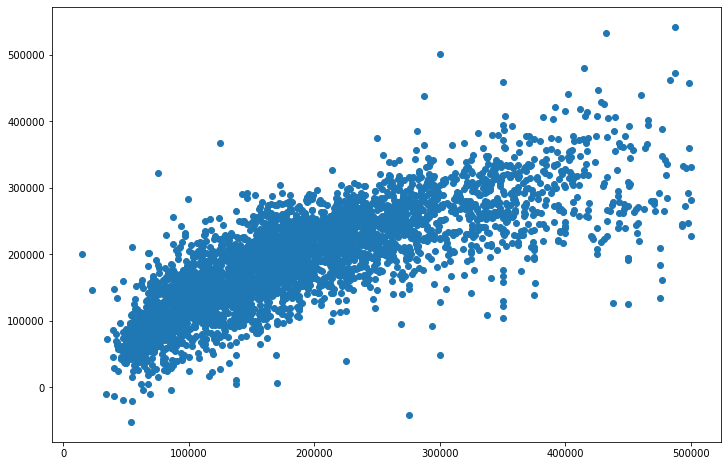

In [25]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [26]:
df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [27]:
df_pred_actual_sample.head()

,index,predicted,actual
0,12502,123008.0,156700.0
1,9460,187264.0,140700.0
2,2930,65600.0,42500.0
3,11968,91968.0,83400.0
4,3442,121408.0,134200.0


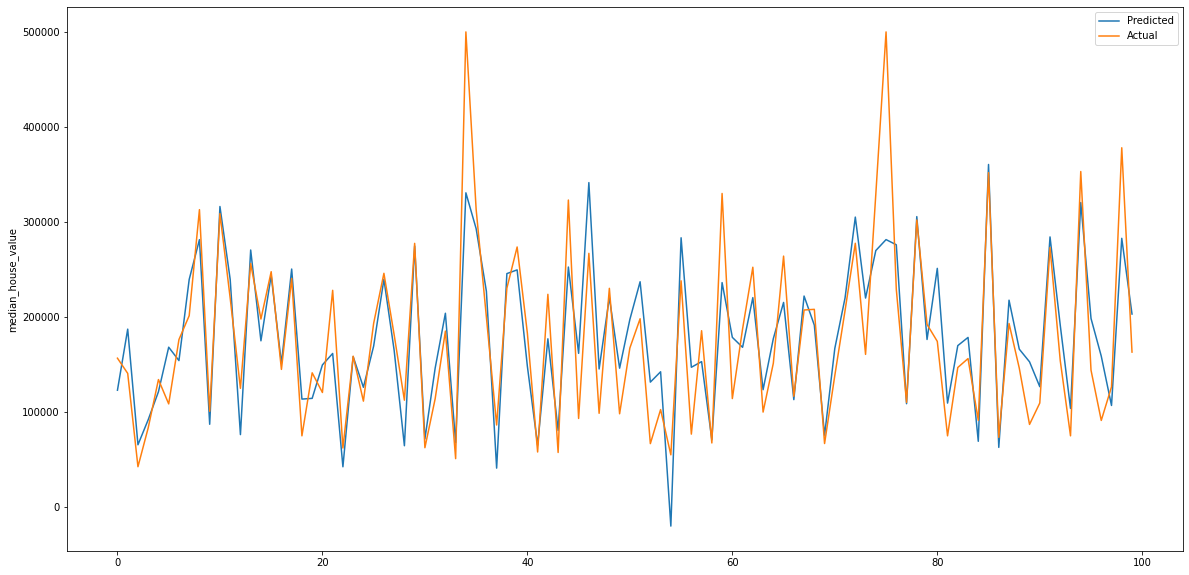

In [28]:
plt.figure(figsize= (20,10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()